# My DC Capstone Project

## Objectives: 
This Notebook project will use location data to identify an ideal location for a new bike shop in the DC area. A similar analysis will use location data to identify an ideal area for opening a new chinese restaurant, based upon zipcode-defined neighborhoods and review information obtained for Foursquare. 

**Analysis #1** For the bike shop analysis, the goal is to find an under-served area identified as:
* The area should be underrepresented by other bike shops as defined by the number of locations. 
* However, this same area includes a large number of parks and trails where a bike could be used. 

**Analysis #2** For the restaurant analysis, the goal is to find an under-served area identified as:
* Areas with popular and successful restaurants as defined by the number of ratings and tips.
* However, this area does not have a highly rated restaurant in a given cuisine (identified by the analysis). 


## Data Sources:
The following data sources will be used:

* Areas will be identified by zip codes with the central point defined by the latitude and longitude. This information can be obtained from http://www.city-data.com/city/Washington-District-of-Columbia.html and a file provided through a GIT site: https://gist.github.com/erichurst/7882666

* Foursquare will provide reviews near the zipcode latitude and longitude. For restaurants, the number of reviews will denote the market potential and the rating will determine how competitive the venue will be. The data required is only available through the Fourscquare premium API and due to lower daily limits with this API, Analysis will be only be performed on Chinese restauarants but could be used across all cuisines. For the bike shop, Fourscare will provide the number of bike shops in an area and the number of venues where a bike could be used, such as bikes and trails. 

* Census data is available for each zip code stratified by revenue: https://factfinder.census.gov/faces/nav/jsf/pages/community_facts.xhtml This isn't available at the cuisine level but does provide the overall success of restaurants. 

In [1]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation


In [2]:
CLIENT_ID = 'CRFCMNG4YYT24XO2YIBFZDSE4BZMKJCQWNKUXX51ZNIOZWHD' # your Foursquare ID
CLIENT_SECRET = 'SLL2MAKNYMUZ0Q20UTS3EBZEF5J240WEAO5R2RE4YP4TQ03V' # your Foursquare Secret
VERSION = '20191201'
LIMIT = 100

CLIENT_ID = 'F2B5P4ZAZRV2NVNYKZ5MIYCQ410EBFM5NZ2LEKSJMZAGLMWV' # your Foursquare ID
CLIENT_SECRET = 'MPQA1IHDXG10LPMF0YK5QV45NFEXDR4LNYJDD5QEEJFY1O0D' # your Foursquare Secret
VERSION = '20191201'
LIMIT = 100

## Analysis #1

In [3]:
# DC Zip Codes
zipcodes = [20001, 20002, 20003, 20004, 20005, 20006, 20007, 20008, 20009, 20010, 20016, 20024, 20036, 20037, 20045, 20052, 20053, 20057, 20064, 20202, 20204, 20228, 20230, 20240, 20245, 20260, 20317, 20390, 20405, 20418, 20427, 20506, 20510]

# Zip Code Lat/Long
df = pd.read_csv('https://gist.githubusercontent.com/erichurst/7882666/raw/5bdc46db47d9515269ab12ed6fb2850377fd869e/US%2520Zip%2520Codes%2520from%25202013%2520Government%2520Data')

# Create DC subset
dcdf = df[df['ZIP'].isin(zipcodes)]
dcdf.shape    

(33, 3)

In [4]:
categoryID1 = '4bf58dd8d48988d115951735' # Bike Shop
categoryID2 = '4e4c9077bd41f78e849722f9' # Bike Rental
categoryID3 = '56aa371be4b08b9a8d57355e' # Bike Trail
categoryID4 = '52e81612bcbc57f1066b7a21' # National Park
categoryID5 = '4bf58dd8d48988d163941735' # Park
categoryID6 = '5bae9231bedf3950379f89d0' # State Park
radius = 804  # 1/2 mile around zipcode center
bikeDict = []

# For each DC zipcode 
for index, row in dcdf.iterrows():
    latitude = row[1]
    longitude = row[2]
    url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&categoryId={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, categoryID1, radius, LIMIT)
    results = requests.get(url).json()
    try:
        out1 = results['response']['totalResults']
    except:
        out1 = 0
    url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&categoryId={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, categoryID2, radius, LIMIT)
    results = requests.get(url).json()
    try:
        out2 = results['response']['totalResults']
    except:
        out2 = 0
    url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&categoryId={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, categoryID3, radius, LIMIT)
    results = requests.get(url).json()
    try:
        out3 = results['response']['totalResults']
    except:
        out3 = 0
    url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&categoryId={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, categoryID4, radius, LIMIT)
    results = requests.get(url).json()
    try:
        out4 = results['response']['totalResults']
    except:
        out4 = 0
    url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&categoryId={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, categoryID5, radius, LIMIT)
    results = requests.get(url).json()
    try:
        out5 = results['response']['totalResults']
    except:
        out5 = 0
    url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&categoryId={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, categoryID6, radius, LIMIT)
    results = requests.get(url).json()
    try:
        out6 = results['response']['totalResults']
    except:
        out6 = 0
    
    dict1 = {}
    dict1.update({'zipcode':int(row[0]),'bike shops':out1,'bike rental':out2,'bike trail':out3,'national park':out4,'park':out5,'state park':out6,'bike outlets':out1+out2,'bike uses':out3+out4+out5+out6}) 
    bikeDict.append(dict1)

bikeData = pd.DataFrame (bikeDict, columns = ['zipcode','bike shops','bike rental','bike trail','national park','park','state park','bike outlets','bike uses'])
bikeData.to_csv('bikedata.csv')

In [5]:
bikeData

,zipcode,bike shops,bike rental,bike trail,national park,park,state park,bike outlets,bike uses
0,20001,0,6,0,0,20,0,6,20
1,20002,0,3,0,0,6,0,3,6
2,20003,1,5,1,0,7,0,6,8
3,20004,1,19,1,4,19,0,20,24
4,20005,2,23,2,0,23,0,25,25
5,20006,0,19,0,1,32,0,19,33
6,20007,0,0,0,0,6,0,0,6
7,20008,0,2,0,0,13,0,2,13
8,20009,2,16,0,0,15,0,18,15
9,20010,0,7,0,0,14,0,7,14


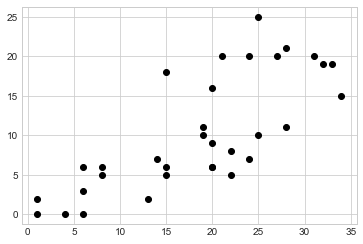

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

x = bikeData['bike uses']
y = bikeData['bike outlets']

plt.plot(x, y, 'o', color='black');

In [12]:
newdf = bikeData[(bikeData['bike uses']/bikeData['bike outlets'] >= 3) & (bikeData['bike uses'] >= 10)]
newdf

,zipcode,bike shops,bike rental,bike trail,national park,park,state park,bike outlets,bike uses
0,20001,0,6,0,0,20,0,6,20
7,20008,0,2,0,0,13,0,2,13
16,20053,0,5,0,2,20,0,5,22
20,20204,0,6,0,2,18,0,6,20
21,20228,0,5,0,3,12,0,5,15
29,20418,0,7,0,6,18,0,7,24


## Analysis #2

In [10]:
categoryID = '4bf58dd8d48988d142941735' #'4bf58dd8d48988d145941735' # Chinese Restaurant
radius = 500  # 500 meters around zipcode center
zipDict = []

# For each DC zipcode 
for index, row in dcdf.iterrows():
    latitude = row[1]
    longitude = row[2]
    url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&categoryId={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, categoryID, radius, LIMIT)
    results = requests.get(url).json()

    # For each zipcode get venues
    zRating = 0
    zSignal = 0
    zWSignal = 0
    zVenues = 0
    for x in results['response']['groups']:
        y = x['items']
        for z in y:
            venID = z['venue']['id']
            # Get venue details 
            url2 = 'https://api.foursquare.com/v2/venues/'+venID+'?client_id={}&client_secret={}&v={}'.format(CLIENT_ID, CLIENT_SECRET, VERSION)
            results2 = requests.get(url2).json()
            try:
                vRating = results2['response']['venue']['rating']
            except:
                vRating = 0
            try:
                vSignal = results2['response']['venue']['ratingSignals']
            except:
                vSignal = 0
            zRating = zRating + vRating
            zSignal = zSignal + vSignal
            zWSignal = zWSignal + (vRating * vSignal)
            zVenues = zVenues + 1
    dict1 = {}
    dict1.update({'zipcode':int(row[0]), 'venues':zVenues, 'rating':zRating, 'signals': zSignal,'wsignals':zWSignal}) 
    zipDict.append(dict1)

zipData = pd.DataFrame (zipDict, columns = ['zipcode','venues','rating','signals','wsignals'])
zipData.to_csv('zipdata.csv')

In [11]:
zipData['avg rating'] = zipData['wsignals']/zipData['signals']
zipData['avg signals'] = zipData['signals']/zipData['venues']

iData = zipData[(zipData['signals'] >= 400) & (zipData['avg rating'] < 8)]
iData

,zipcode,venues,rating,signals,wsignals,avg rating,avg signals
3,20004,11,41.3,552,4301.1,7.791848,50.181818
4,20005,16,74.8,977,7381.0,7.554759,61.062500
5,20006,16,66.4,627,4906.6,7.825518,39.187500
15,20052,21,67.9,684,5365.6,7.844444,32.571429
30,20427,24,109.3,1005,7696.1,7.657811,41.875000
